In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [4]:
##Load data set
dataframe=pd.read_csv("D:/JupyterNotebooks/loan_prediction.csv")
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
dataframe.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
dataframe.drop('Loan_ID',inplace=True,axis=1)
dataframe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
dataframe.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data:

In [27]:
dataframe['Gender'].fillna(dataframe['Gender'].mode()[0],inplace=True)
dataframe['Married'].fillna(dataframe['Married'].mode()[0],inplace=True)
dataframe['Dependents'].fillna(dataframe['Dependents'].mode()[0],inplace=True)
dataframe['Self_Employed'].fillna(dataframe['Self_Employed'].mode()[0],inplace=True)

In [32]:
# Fill missing values in LoanAmount with the median
dataframe.fillna({'LoanAmount':dataframe['LoanAmount'].median()},inplace=True)
# Fill missing values in Loan_Amount_Term with the mode
dataframe.fillna({'Loan_Amount_Term':dataframe['Loan_Amount_Term'].mode()[0]}, inplace=True)
# Fill missing values in Credit_History with the mode
dataframe.fillna({'Credit_History':dataframe['Credit_History'].mode()[0]}, inplace=True)

In [33]:
dataframe.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis
Now let’s have a look at the distribution of the loan status column:

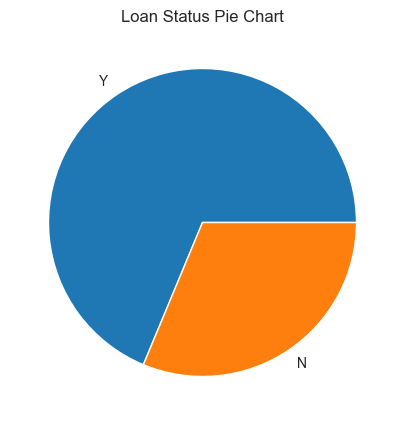

In [47]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
plt.pie(x=dataframe['Loan_Status'].value_counts(),labels=dataframe['Loan_Status'].value_counts().index)
plt.title('Loan Status Pie Chart')
plt.show()

In [48]:
counts=dataframe['Loan_Status'].value_counts()
counts

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [49]:
counts.index

Index(['Y', 'N'], dtype='object', name='Loan_Status')

In [50]:
#Now let’s have a look at the distribution of the gender column:

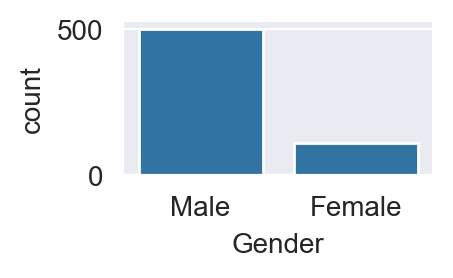

In [57]:
plt.figure(figsize=(2,1),dpi=200)
sns.countplot(x='Gender',data=dataframe)
plt.show()

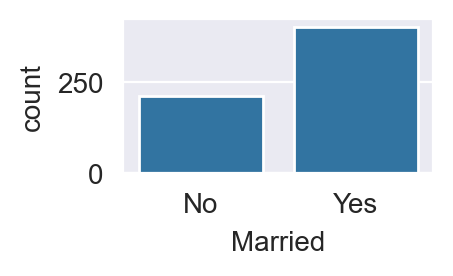

In [58]:
#Now let’s have a look at the distribution of the martial status column:
plt.figure(figsize=(2,1),dpi=200)
sns.countplot(x='Married',data=dataframe)
plt.show()

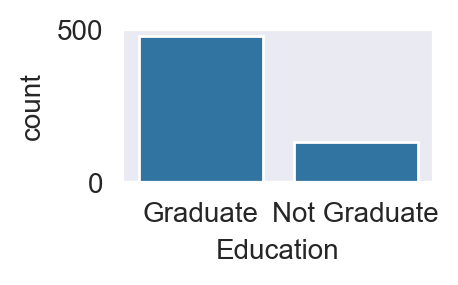

In [59]:
#Now let’s have a look at the distribution of the education column:
plt.figure(figsize=(2,1),dpi=200)
sns.countplot(x='Education',data=dataframe)
plt.show()

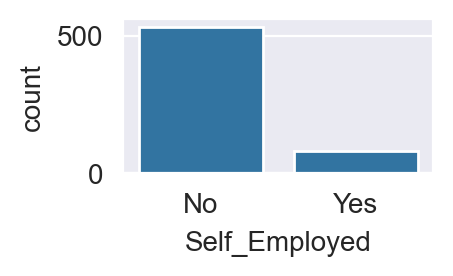

In [60]:
#Now let’s have a look at the distribution of the self-employment column:
plt.figure(figsize=(2,1),dpi=200)
sns.countplot(x='Self_Employed',data=dataframe)
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

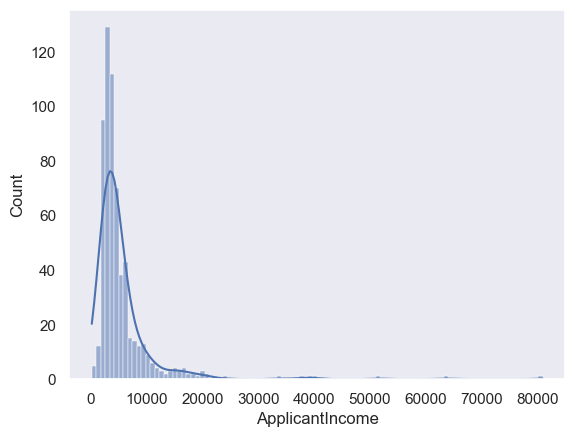

In [62]:
#Now let’s have a look at the distribution of the Applicant Income column:
sns.set(style='dark')
sns.histplot(data=dataframe,x='ApplicantIncome',kde=True,bins=100)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

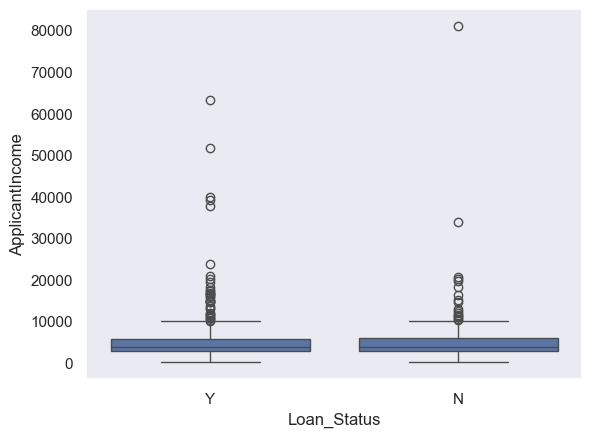

In [66]:
#Now let’s have a look at the relationship between the income of the loan applicant and the loan status:
sns.boxplot(y='ApplicantIncome',x='Loan_Status',data=dataframe,hue_order='Loan_Status')

In [67]:
#The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [68]:
# Calculate the IQR
Q1 = dataframe['ApplicantIncome'].quantile(0.25)
Q3 = dataframe['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataframe = dataframe[(dataframe['ApplicantIncome'] >= lower_bound) & (dataframe['ApplicantIncome'] <= upper_bound)]

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

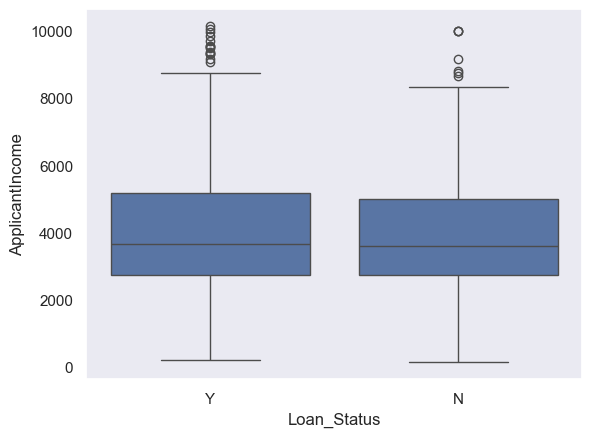

In [69]:
#Now let’s have a look at the relationship between the income of the loan applicant and the loan status:
sns.boxplot(y='ApplicantIncome',x='Loan_Status',data=dataframe,hue_order='Loan_Status')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

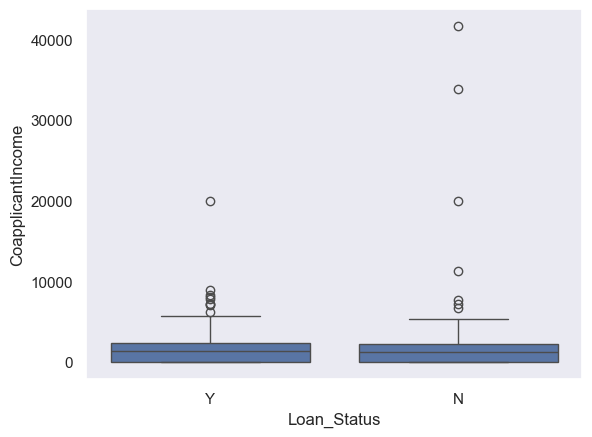

In [71]:
#Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:
sns.boxplot(y='CoapplicantIncome',x='Loan_Status',data=dataframe,hue_order='Loan_Status')

#The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:

In [74]:
q1=dataframe['CoapplicantIncome'].quantile(0.25)
q3=dataframe['CoapplicantIncome'].quantile(0.75)
threshold =q3-q1

lower_limit = q1-1.5*threshold
upper_limit = q1+1.5*threshold

dataframe=dataframe[(dataframe['CoapplicantIncome']>=lower_limit) & (dataframe['CoapplicantIncome']<=upper_limit)]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

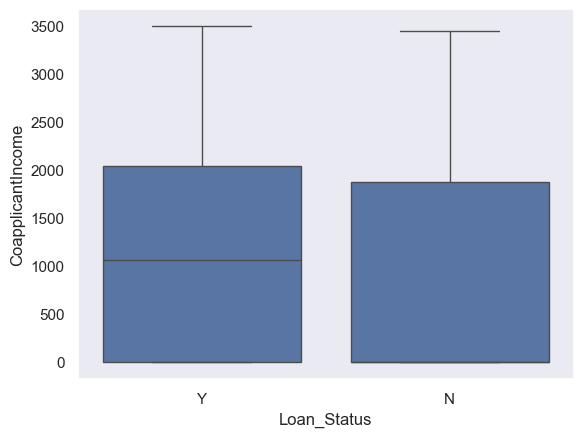

In [75]:
#Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:
sns.boxplot(y='CoapplicantIncome',x='Loan_Status',data=dataframe,hue_order='Loan_Status')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

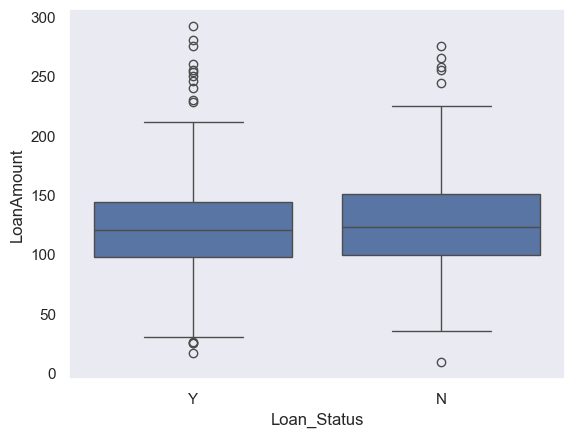

In [77]:
#ow let’s have a look at the relationship between the loan amount and the loan status:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=dataframe,hue_order='Loan_Status')

<Axes: xlabel='Loan_Status', ylabel='Count'>

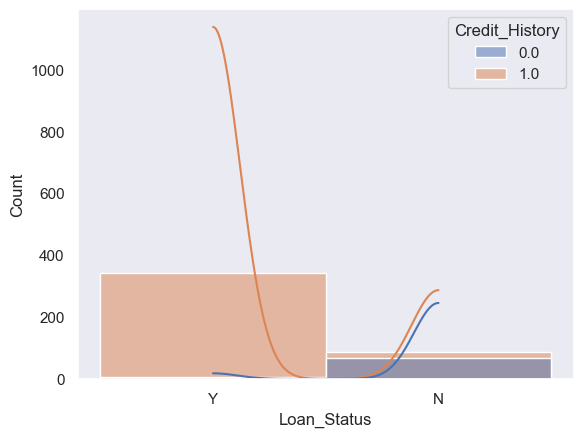

In [89]:
#Now let’s have a look at the relationship between credit history and loan status:
sns.histplot(data=dataframe,x='Loan_Status',hue='Credit_History',kde=True,bins=100)

<Axes: xlabel='Property_Area', ylabel='Count'>

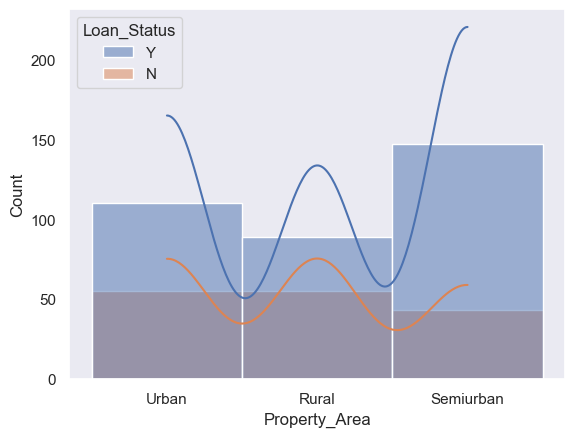

In [90]:
#Now let’s have a look at the relationship between the property area and the loan status:
sns.histplot(data=dataframe,x='Property_Area',hue='Loan_Status',kde=True,bins=100)

In [91]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
dataframe = pd.get_dummies(dataframe, columns=cat_cols)

# Split the dataset into features (X) and target (y)
X = dataframe.drop('Loan_Status', axis=1)
y = dataframe['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [92]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']


In [93]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568        -0.933672          -0.938740   -2.572647          0.266145   
85         -0.939988           1.295971    0.227983          0.266145   
289         2.818683          -0.938740    1.352646          0.266145   
221        -0.075314           0.577261   -0.213061          0.266145   
295         0.138880           0.164930   -0.345374          0.266145   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
568        0.416569           True        False        True        False   
85         0.416569          False         True        True        False   
289        0.416569          False         True        True        False   
221        0.416569          False         True       False         True   
295        0.416569          False         True       False         True   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
568          True  ...       